In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations


pd.set_option('display.max_columns', 30)

students_df = pd.read_csv('stud_math.csv')

### Сначала посмотрим базовые вещи. 

In [2]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### 30 колонок, по некоторым из них присутствует достаточно большое (10%) кол-во пропусков. Пройдемся по колонкам.  

# Score
### Начнем с анализа значений оценки. Необходимо очистить их, т.к. весь остальной анализ будет строиться в привязке к данным по оценкам и лучше сразу опираться на чистые данные. 

In [3]:
students_df['score'].describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [4]:
students_df[students_df['score'].isna() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


### В записях присутствуют нулевые значения, а так же присутствуют пропуски в кол-ве 7 штук. Скорее всего 0 и пропуск характерны для одной ситуации, когда оценка по каким-то причинам не была получена. Поэтому пропуски заполним нулями и разделим исходный датафрейм на два - с нулевыми значениями в поле score и ненулевыми. 

In [5]:
students_df[students_df['score'].isna() == True]['score'].fillna(0)

201    0.0
244    0.0
270    0.0
283    0.0
312    0.0
350    0.0
Name: score, dtype: float64

In [6]:
students_df[students_df['score'].isna() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [7]:
strange_students_df = students_df[students_df['score'] == 0]
students_df = students_df[students_df['score'] > 0]

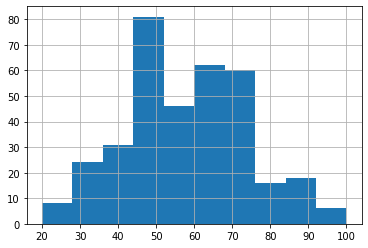

In [8]:
students_df['score'].hist()

In [9]:
students_df['score'].describe()

count    352.000000
mean      57.755682
std       16.200928
min       20.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

### Распределение параметра score в усеченной выборке выглядит нормальным. 
### Выбросов нет. Для удобства анализа в будущем напишем функцию фильтрации выбросов. 
### Итоговую выборку проверим обобщённым тестом Д'Агостино-Пирсона на нормальность распределения с помощью функции из библиотеки scipy.stats.

In [10]:
students_df[students_df['score'] == 0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score


In [11]:
# В функцию будем передавать датафрейм и название колонки, 
# по которой будет происходить фильтрация

def iqr_filter(dataframe, column_name):
    
    quartil_25 = dataframe[column_name].quantile(0.25)
    quartil_75 = dataframe[column_name].quantile(0.75)
    IQR = quartil_75 - quartil_25
    
    filtered_dataframe = dataframe.loc[dataframe[column_name].
                                       between(quartil_25 - 1.5*IQR, quartil_75 + 1.5*IQR)]
    
    return filtered_dataframe

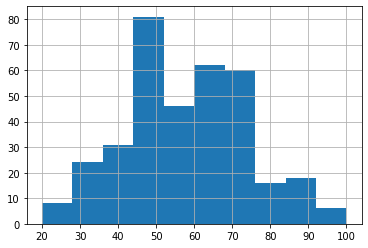

In [12]:
student_df = iqr_filter(students_df, 'score')
students_df['score'].hist()

### Фильтрация усеченной выборки, как и ожидалось, ничего не дала. 

In [13]:
stats.normaltest(students_df['score'], nan_policy = 'omit')

NormaltestResult(statistic=5.920251504458254, pvalue=0.051812401238085656)

### Значение p-value больше 5%, поэтмоу можно утверждать, что распределение нормальное с 5% вероятностью ошибки. 
### Посмотрим на нашу модифицированную выборку и двигаемся дальше.

In [14]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               352 non-null    object 
 1   sex                  352 non-null    object 
 2   age                  352 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              328 non-null    object 
 5   Pstatus              311 non-null    object 
 6   Medu                 350 non-null    float64
 7   Fedu                 331 non-null    float64
 8   Mjob                 335 non-null    object 
 9   Fjob                 320 non-null    object 
 10  reason               337 non-null    object 
 11  guardian             323 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            345 non-null    float64
 14  failures             332 non-null    float64
 15  schoolsup            343 non-null    obj

# School
### Номинативный параметр. Оценим распределение по категория. 

In [15]:
students_df['school'].value_counts(dropna = False)

GP    311
MS     41
Name: school, dtype: int64

In [16]:
students_df.groupby(['school'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
school,,,,,,,,
GP,311.0,58.215434,16.282245,20.0,47.5,55.0,70.0,100.0
MS,41.0,54.268293,15.311800,25.0,45.0,50.0,65.0,95.0


### В колонке нет пропусков, всего два признака, выборки значений score по признакам достаточно большие (> 30) и можно утверждат, что они имеют нормальное распределение. При анализе статистических данных двух выборок можно увидеть смещение по среднему и медиане на 4-5 баллов при стандартном отклонении (здесь и далее СКО) равном 15-16. Можно предположить, что смещения статистически не значимы. 
### Чтобы оценить статистическую значимость распределения целевого значения score по признакам оценим разность средних используя функцию теста Стьюдента из модуля scipy.stats

In [17]:
# Пишем обобщенную функцию тестирования
# На вход передаем наш датафрейм, название колонки, которая содержит признаки,
# по которым будет выполняться тестирование, название колонки,
# по которой будет браться выборка (score в нашем тесте),
# кол-во параметров, которое будет учитываться при тестировании, а также
# p-value критическое нулевой гипотезы о равенстве средних. 

def stat_dif(dataframe, test_column_name, value_column_name, param_number, pvalue_critical):
    
    i = int(0)
    param_list = dataframe[test_column_name].value_counts().index[:param_number]
    hypotheses = list(combinations(param_list, 2))
    
    for hypothes in hypotheses:
        
        param_x = dataframe[dataframe[test_column_name] == hypothes[0]][value_column_name]
        param_y = dataframe[dataframe[test_column_name] == hypothes[1]][value_column_name]
        pvalue = stats.ttest_ind(param_x, param_y, nan_policy='omit' ).pvalue
        
        if pvalue < pvalue_critical/len(hypotheses):
            print('Найдены статистически значимые различия для пары параметров:', hypothes, 
                  'P_value гипотезы о равенстве средних составляет:', pvalue, sep = '\n')
            i += 1
    
    if i == 0:
        print('Статистически значимых различий в исследуемой колонке не обнаружено')

In [18]:
stat_dif(students_df, 'school', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Предположение об отсутствии статистически значимого сдвига оправдалось. 5% ошибку задали исходя из того, что этот уровень был выбран как допустимый, при котором распределение Score "остается нормальным". При увеличении до 10% мы будем вынуждены отказаться от нормальности распределения score, а "кому это надо?". 
### Колонку с этим параметром можно будет удалить.

# Sex
### номинативный параметр, по которому нет пропусков. Смотрим распределение и оцениваем статистическую значимость.

In [19]:
students_df['sex'].value_counts(dropna = False)

F    182
M    170
Name: sex, dtype: int64

In [20]:
students_df.groupby(['sex'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
F,182.0,56.153846,15.969185,20.0,45.0,55.0,68.75,95.0
M,170.0,59.470588,16.318275,25.0,50.0,60.0,70.00,100.0


### Есть смещение по среднему, нижнему и верхнему квартилям в пользу мальчиков, медианы при этом совпадают, СКО практически идентичны. Можно было бы предположить, что мальчикам математика дается лучше, но мы не хотим, чтобы нас обвинили в сексизме, поэтому проверим тестом Стьюдента

In [21]:
stat_dif(students_df, 'sex', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


In [22]:
stat_dif(students_df, 'sex', 'score', 2, 0.1)

Найдены статистически значимые различия для пары параметров:
('F', 'M')
P_value гипотезы о равенстве средних составляет:
0.05481629433224236


### Интересно, что P-value округленно равно 5%. Отбрасываем гипотезу о статистической значимости, не будем навлекать на себя гнев. Колонку с этим параметром можно будет удалить.

# Age
### Параметр с одной стороны числовой, с другой номинативный. Пропусков в выборке нет, поэтмоу можно посмотреть распределение. 

In [23]:
students_df['age'].value_counts()

16    96
17    90
15    76
18    69
19    16
20     3
22     1
21     1
Name: age, dtype: int64

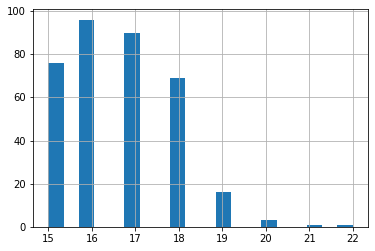

In [24]:
students_df['age'].hist(bins=20)

In [25]:
students_df['age'].describe()

count    352.000000
mean      16.633523
std        1.256011
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

### Интересно. Распределение по возрасту выглядит нормально, если не брать в расчет возраст 19+. Эти группы параметров имеют малую выборку (в сумме менее 30, что не очень здорово). Стоит взять на заметку, что в школах обучаются до 18 лет, поэтому эти группы 19 более лет говорят о том, что мы имеем дело не с "нормальным ходом вещей" и это, скорее всего "отстающие" ученики. Можно посмотреть распределение оценок для этой "бедовой" группы.

In [26]:
students_df[students_df['age'] > 18]['score'].describe()

count    21.000000
mean     53.809524
std      13.684367
min      35.000000
25%      45.000000
50%      55.000000
75%      65.000000
max      90.000000
Name: score, dtype: float64

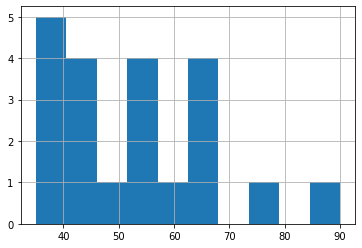

In [27]:
students_df[students_df['age'] > 18]['score'].hist()

### Нормальным распределение в данной выборке по возрасту 19+ назвать сложно. Тем не менее, среднее незначительно смещено влево(4 балла) относительно общей выборки по оценкам, медиана совпадает, а СКО меньше. Поэтому показаний к удалению в явном виде нет. 
### проведем тест стьюдента для возрастной группы 15-18 лет. Если данный параметр будет оказывать статистически значимое влияние на итоговую оценку, тогда нужно будет что-то решать с отстающими. Если же влияния нет, то можно будет исключить параметр целиком и не исключать записи "отстающих" из общей выборки.

In [28]:
stat_dif(students_df, 'age', 'score', 4, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Параметр возраста не является статистически значимым, его можно исключить из модели. Правды ради, пройдемся IQR фильтром и посмотрим, будут ли отфильтрованы выбросы. 

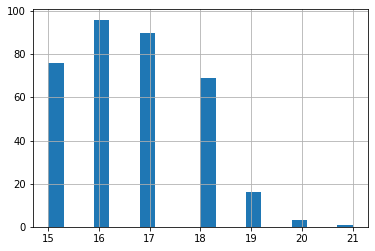

In [29]:
test_students_df = iqr_filter(students_df, 'age')
test_students_df['age'].hist(bins=20)

### Да, возрастная группа 22 года статистически является выбросом. При этом как было упомянуто выше, отфильтровывать данные записи не имеет смысла, т.к. параметр возраста не оказывает статистического влияния на итоговую оценку. 
### Колонку удаляем, записи не трогаем.

# Address
### Номинативный признак, присутствуют пропуски. Смотрим.

In [30]:
students_df['address'].value_counts(dropna=False)

U      265
R       73
NaN     14
Name: address, dtype: int64

In [31]:
students_df.groupby(['address'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
address,,,,,,,,
R,73.0,53.356164,16.203026,25.0,40.0,50.0,65.0,95.0
U,265.0,58.830189,16.182828,20.0,45.0,55.0,70.0,100.0


### Что ж, есть смещение по среднему и медиане и обоим квартилям. Счет в пользу городских жителей, что можно объяснить. Стоит пройтись тестом Стьюдента по непропущенным значениям. 

In [32]:
stat_dif(students_df, 'address', 'score', 2, 0.05)

Найдены статистически значимые различия для пары параметров:
('U', 'R')
P_value гипотезы о равенстве средних составляет:
0.010954630500627841


### С 5% уровнем значимости параметр влияет на итоговое распределение. При этом p-value = 1%. Посмотрим на выборку из 14 записей с пропусками, при этом обратим внимание на два других параметра - причины выбора школы и время добора до учебного заведения.

In [33]:
students_df[students_df['address'].isna() == True].loc[:, ['address', 'reason', 'traveltime']]

,address,reason,traveltime
6,NaN,home,1.0
52,NaN,other,2.0
75,NaN,home,1.0
92,NaN,home,1.0
96,NaN,reputation,2.0
159,NaN,course,1.0
241,NaN,course,NaN
254,NaN,course,1.0
292,NaN,reputation,1.0
348,NaN,reputation,NaN


### Картина проясняется. Есть три записи, у которых время добора отсутствует, для одной из которых критерий выбора был в расположении от дома. Для этих трех записей мы не сможем сделать убедительного предположения о месте жительства. 
### При этом для всех записей время добора до школы не превышает 30 минут, и можно предположить, что место проживания и школа находятся в одной области (город или пригород). 
### Поэтому построить предположение о месте проживания по времени добора до школы не представляется возможным. Наиболее корректным будет удалить данные записи, хотя их число значительно.
### В конце концов, наша задача подготовить корректную модель с корректно подобранными параметрами и дать инструкцию на будущее использование, где будет однозначно указано, что по данному параметру пропуски значений не допускаются.

In [34]:
students_df = students_df[students_df['address'].isna() != True]

In [35]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               338 non-null    object 
 1   sex                  338 non-null    object 
 2   age                  338 non-null    int64  
 3   address              338 non-null    object 
 4   famsize              315 non-null    object 
 5   Pstatus              298 non-null    object 
 6   Medu                 337 non-null    float64
 7   Fedu                 318 non-null    float64
 8   Mjob                 321 non-null    object 
 9   Fjob                 307 non-null    object 
 10  reason               323 non-null    object 
 11  guardian             310 non-null    object 
 12  traveltime           318 non-null    float64
 13  studytime            331 non-null    float64
 14  failures             318 non-null    float64
 15  schoolsup            329 non-null    obj

### Удалили.

# Famsize
### Номинативный с пропусками. Смотрим.

In [36]:
students_df['famsize'].value_counts(dropna=False)

GT3    221
LE3     94
NaN     23
Name: famsize, dtype: int64

In [37]:
students_df.groupby(['famsize'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
famsize,,,,,,,,
GT3,221.0,57.420814,16.213051,20.0,45.00,55.0,70.0,100.0
LE3,94.0,58.617021,16.254102,25.0,46.25,57.5,70.0,95.0


In [38]:
stat_dif(students_df, 'famsize', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Кол-во пропусков в выборке менее 30. Провели Т-тест для двух значений. Значимости нет, параметр можно исключить.

# Pstatus
### Номинативный с пропусками. Смотрим.

In [39]:
students_df['Pstatus'].value_counts(dropna=False)

T      266
NaN     40
A       32
Name: Pstatus, dtype: int64

In [40]:
students_df.groupby(['Pstatus'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
Pstatus,,,,,,,,
A,32.0,58.593750,18.761421,30.0,45.0,55.0,71.25,95.0
T,266.0,57.387218,15.996358,20.0,45.0,55.0,70.00,100.0


In [41]:
stat_dif(students_df, 'Pstatus', 'score', 3, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### В данном случае пропусков даже больше, чем некоторых значений. Тест Стьюдента говорит, что по всем трем значениям параметра значимости влияния нет. 
### Параметр можно не учитывать для построения модели.

# Medu
### Номинативный с пропусками. Смотрим.

In [42]:
students_df['Medu'].value_counts(dropna=False)

4.0    118
3.0     86
2.0     84
1.0     46
0.0      3
NaN      1
Name: Medu, dtype: int64

### Пропуск всего один, без образования - всего 3. В сумме выборка по этим двум значениям нерепрезентативна. Посмотрим на распределение по остальным значениям параметра и сделает Т-тест.

In [43]:
students_df.groupby(['Medu'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
Medu,,,,,,,,
0.0,3.0,65.000000,17.320508,45.0,60.0,75.0,75.0,75.0
1.0,46.0,50.760870,12.154898,25.0,45.0,50.0,60.0,80.0
2.0,84.0,56.250000,14.032557,30.0,45.0,55.0,65.0,95.0
3.0,86.0,57.151163,17.210474,25.0,45.0,55.0,70.0,95.0
4.0,118.0,61.567797,17.683098,20.0,50.0,65.0,75.0,100.0


In [44]:
stat_dif(students_df, 'Medu', 'score', 4, 0.05)

Найдены статистически значимые различия для пары параметров:
(4.0, 1.0)
P_value гипотезы о равенстве средних составляет:
0.00020006248361860906


### Всё указывает на то, что параметр влияет на распределение оценок, хотя можно было предположить, что влиять будет Fedu, т.к. помагать отпрыску с математикой в мое время, как правило, было делом для папы. Видимо, те времена прошли. 
### Т.к. есть влияние даже при 1% уровне важности, и параметр для модели мы оставляем, необходимо что-то решать с пропусками и "безграмотными". Проверим распределение на выбросы.

In [45]:
students_df['Medu'].describe()

count    337.000000
mean       2.801187
std        1.090652
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

### Нижний квартиль - 2, межквартильный размах - 2, соответственно "безграмотные" не являются выбросом. Посмотрим на эту группу отдельно. 

In [46]:
students_df[(students_df['Medu'] == 0) | (students_df['Medu'].isna() == True)].loc[:,['score', 'Medu', 'Fedu']]

,score,Medu,Fedu
127,45.0,0.0,1.0
193,50.0,NaN,3.0
249,75.0,0.0,2.0
324,75.0,0.0,2.0


### Видим, для двух записей балл выше среднего, видимо, папа не подкачал. 
### заменим пропуск на 0. Даже если мы и ошибаемся, это не окажет сильного влияния на итоговое распределение, т.к. значение оценки чуть ниже среднего. 

In [47]:
students_df['Medu'][193] = 0

### Параметр оставляем для модели. 

# Fedu
### по характеру схож с medu. Проверяем. 

In [48]:
students_df['Fedu'].value_counts(dropna=False)

2.0     90
3.0     85
4.0     79
1.0     61
NaN     20
0.0      2
40.0     1
Name: Fedu, dtype: int64

In [49]:
stat_dif(students_df, 'Fedu', 'score', 4, 0.05)

Найдены статистически значимые различия для пары параметров:
(4.0, 1.0)
P_value гипотезы о равенстве средних составляет:
0.0026138818011784376


### Так и есть, параметр статистически влияет на итоговое распределение. При этом тут много артефактов: 20 пропусков и выброс со значением 40. Выброс - скорее всего опечатка, заменим на 4. И посмотрим отдельно на группу пропущенных и нулевых значений.

In [50]:
students_df['Fedu'].replace(40, 4, inplace = True)

In [51]:
students_df[(students_df['Fedu'] == 0) | (students_df['Fedu'].isna() == True)].loc[:,['score', 'Medu', 'Fedu']]

,score,Medu,Fedu
21,75.0,4.0,NaN
42,90.0,4.0,NaN
46,55.0,3.0,NaN
57,75.0,4.0,NaN
58,45.0,1.0,NaN
67,30.0,3.0,NaN
76,50.0,4.0,0.0
142,55.0,4.0,NaN
161,35.0,3.0,NaN
171,80.0,1.0,0.0


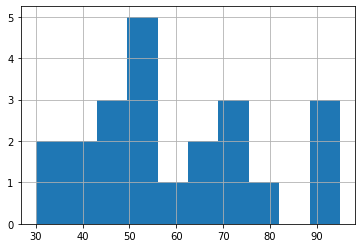

In [52]:
students_df[(students_df['Fedu'] == 0) | (students_df['Fedu'].isna() == True)]['score'].hist()

In [53]:
students_df[(students_df['Fedu'] == 0) | (students_df['Fedu'].isna() == True)]['score'].describe()

count    22.000000
mean     60.000000
std      19.210612
min      30.000000
25%      45.000000
50%      55.000000
75%      75.000000
max      95.000000
Name: score, dtype: float64

In [54]:
stats.normaltest(students_df[(students_df['Fedu'] == 0) | (students_df['Fedu'].isna() == True)]['score'], 
                 nan_policy = 'omit')

NormaltestResult(statistic=1.6732037954685002, pvalue=0.4331800152646299)

### Что ж, выборка 0 и пропусков хоть и не является большой (менее 30 штук), но образована из нормально распределенной величины. Медиана совпадает со значением медианы для общей выборки score, а тест на нормальность дает p-value больше 5%, поэтмоу можно сделать предположение, что если мы заполним пропуски 0 значением, это не приведет к смещению оценки значений score при построении модели.
### Заменяем.

In [55]:
students_df['Fedu'].fillna(0, inplace=True)

### Параметр оставляем для итоговой модели.

# Mjob
### номинативный параметр с пропусками. Смотрим по отработанной схеме.

In [56]:
students_df['Mjob'].value_counts(dropna=False)

other       110
services     87
teacher      49
at_home      48
health       27
NaN          17
Name: Mjob, dtype: int64

In [57]:
students_df.groupby(['Mjob'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
Mjob,,,,,,,,
at_home,48.0,53.541667,14.252970,25.0,45.0,50.0,65.0,95.0
health,27.0,64.444444,15.400633,40.0,55.0,65.0,75.0,100.0
other,110.0,54.818182,15.487895,20.0,45.0,55.0,65.0,95.0
services,87.0,59.425287,17.125143,25.0,50.0,55.0,72.5,95.0
teacher,49.0,59.693878,17.090694,30.0,45.0,55.0,75.0,95.0


### Статистические характеристики в зависимости от значения параметра гуляют. Надо сделать Т-тест, предварительно убрав пропуски, коих достаточно много. Т.к. есть вариант "прочие" определим для пропусков эту категорию. Заменяем.

In [58]:
students_df['Mjob'].fillna('other', inplace=True)
students_df['Mjob'].value_counts(dropna=False)

other       127
services     87
teacher      49
at_home      48
health       27
Name: Mjob, dtype: int64

In [59]:
stat_dif(students_df, 'Mjob', 'score', 4, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


In [60]:
stat_dif(students_df, 'Mjob', 'score', 5, 0.05)

Найдены статистически значимые различия для пары параметров:
('at_home', 'health')
P_value гипотезы о равенстве средних составляет:
0.002840359301173002


### Забавно, для 4 параметров Т-тест не проходит, но если добавить выборку с параметром health, то возникает статистически значимый сдвиг. Смущает только, что выборка по этому параметру менее 30. Сделает отдельно для нее тест на нормальность, в этот раз по методу Шапиро.

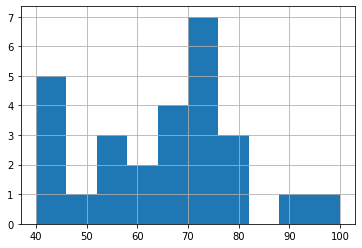

In [61]:
students_df[students_df['Mjob'] == 'health']['score'].hist()

In [62]:
stats.shapiro(students_df[students_df['Mjob'] == 'health']['score'])

(0.9657626748085022, 0.49467265605926514)

In [63]:
stats.normaltest(students_df[students_df['Mjob'] == 'health']['score'])

NormaltestResult(statistic=0.12447082690647113, pvalue=0.9396616517569458)

### Распределение выглядит нормальным, поэтому игнорировать параметр мы не будем. Интересно, что по данной выборке наблюдается ощутимое смещение оценки в большую сторону.
### Параметр оставляем для модели

# Fjob
### Здесь проведем аналогичный анализ как с параметром Mjob

In [64]:
students_df['Fjob'].value_counts(dropna=False)

other       167
services     87
NaN          31
teacher      26
health       15
at_home      12
Name: Fjob, dtype: int64

In [65]:
students_df.groupby(['Fjob'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
Fjob,,,,,,,,
at_home,12.0,59.166667,18.688029,30.0,45.0,57.5,71.25,95.0
health,15.0,55.666667,14.984119,35.0,42.5,55.0,67.50,80.0
other,167.0,56.526946,15.334745,25.0,50.0,55.0,65.00,95.0
services,87.0,55.804598,14.098358,25.0,45.0,55.0,65.00,90.0
teacher,26.0,66.730769,19.075760,30.0,55.0,70.0,80.00,95.0


### История повторяется. Значительное кол-во пропусков и ощутимое смещение вправо по значению параметра teacher. В принципе, это объясняемо, т.к. наличие учителя в семье должно помагать в учебе. При этом отметим, что в случае с работой матери, наличие учителя не давало какого-то выйгрыша. По всей видимости, в выборке преобладали женщины-учителя гуманитарных наук.
### Заменяем пропуски на other и делаем Т-тест

In [66]:
students_df['Fjob'].fillna('other', inplace=True)
students_df['Fjob'].value_counts(dropna=False)

other       198
services     87
teacher      26
health       15
at_home      12
Name: Fjob, dtype: int64

In [67]:
stat_dif(students_df, 'Fjob', 'score', 4, 0.05)

Найдены статистически значимые различия для пары параметров:
('other', 'teacher')
P_value гипотезы о равенстве средних составляет:
0.008041992415283946
Найдены статистически значимые различия для пары параметров:
('services', 'teacher')
P_value гипотезы о равенстве средних составляет:
0.0018945133531606292


### И снова у нас статистически значимое смещение по одному параметру. Можно оставить и этот параметр для модели. 

### При этом меня не покидает ощущение, что, строго говоря, что-то не так. Смещение лишь по одному значению параметра, при условии, что по другим 4-м смещений нет, к тому же выборка по этому параметру меньше 30, пусть и выглядит нормальной. 
### если мы понизим веротность ошибки до отметки 1% значимости, то Т-тесты по обоим параметрам не дадут нам статистически значимого смещения. 
### Поэтому можно рассмотреть вариант исключения Mjob и Fjob из итоговой модели.

# Reason
### Номинативный параметр, есть некоторое кол-во пропусков. По существу ждать его значимости на итоговый балл не стоит.

In [68]:
students_df['reason'].value_counts(dropna=False)

course        114
reputation     93
home           84
other          32
NaN            15
Name: reason, dtype: int64

In [69]:
students_df.groupby(['reason'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
reason,,,,,,,,
course,114.0,56.052632,16.340861,25.0,45.00,55.0,65.00,95.0
home,84.0,58.630952,15.665002,25.0,50.00,55.0,70.00,95.0
other,32.0,57.812500,17.130312,25.0,48.75,57.5,66.25,95.0
reputation,93.0,58.709677,17.034224,20.0,50.00,60.0,70.00,100.0


In [70]:
stat_dif(students_df, 'reason', 'score', 4, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Предположение подтвердилось, значимости для модели в явном виде нет, можно исключить признак и не морочить голову с заполнением пропусков.

# guardian
### Можно предположить, как и выше, что влияния не будет. Смотрим.

In [71]:
students_df['guardian'].value_counts(dropna=False)

mother    216
father     74
NaN        28
other      20
Name: guardian, dtype: int64

In [72]:
students_df.groupby(['guardian'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
guardian,,,,,,,,
father,74.0,59.121622,15.313127,25.0,50.00,57.5,70.0,90.0
mother,216.0,57.847222,17.404084,20.0,45.00,55.0,70.0,100.0
other,20.0,54.750000,13.905224,40.0,43.75,52.5,65.0,90.0


### Сходу однозначно и не скажешь. Много пропусков. Если предположить, что пропуски можно отнести в категорию "прочие", а по логике мы можем это сделать, то по этой категории сформируется достаточно большая выборка (более 30). Заменяем и делаем Т-тест по трем значениям параметра.

In [73]:
students_df['guardian'].fillna('other', inplace=True)
students_df['guardian'].value_counts(dropna=False)

mother    216
father     74
other      48
Name: guardian, dtype: int64

In [74]:
students_df.groupby(['guardian'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
guardian,,,,,,,,
father,74.0,59.121622,15.313127,25.0,50.0,57.5,70.00,90.0
mother,216.0,57.847222,17.404084,20.0,45.0,55.0,70.00,100.0
other,48.0,54.479167,12.083028,35.0,45.0,55.0,61.25,90.0


In [75]:
stat_dif(students_df, 'guardian', 'score', 3, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Результат Т-теста подтвердил то, что мы видем в значениях мер центра и разброса для трех значения параметра. Вариации минимальны, статистического влияния нет.
### Параметр в модель не включаем. 

# traveltime 
### Что-то мне подсказывает, что и отэтого параметра мы избавимся.

In [76]:
students_df['traveltime'].value_counts(dropna=False)

1.0    213
2.0     81
NaN     20
3.0     17
4.0      7
Name: traveltime, dtype: int64

### Здесь можно только порадоваться за детишек, т.к. подавляющее большинство из них не тратит и 15 минут на добор до школы. Пропусков достаточно много, заменить на что-то из имеющегося не представляется возможным. Заменим на число 5, чтобы посмотреть, как это отразится на распределении. 

In [77]:
students_df['traveltime'].fillna(5.0, inplace=True)
students_df['traveltime'].value_counts(dropna=False)

1.0    213
2.0     81
5.0     20
3.0     17
4.0      7
Name: traveltime, dtype: int64

In [78]:
students_df.groupby(['traveltime'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
traveltime,,,,,,,,
1.0,213.0,58.615023,16.832475,20.0,45.0,55.0,70.0,100.0
2.0,81.0,55.925926,15.085405,30.0,45.0,55.0,65.0,95.0
3.0,17.0,57.352941,14.696688,30.0,50.0,55.0,65.0,90.0
4.0,7.0,50.000000,9.128709,35.0,47.5,50.0,52.5,65.0
5.0,20.0,57.250000,18.741665,25.0,47.5,55.0,75.0,90.0


### Выбивается значение параметра 4, но этих значений в выборке всего 7, что слишком мало, чтобы на их основе делать анализ статистически значимого смещения. Сделаем Т-тест по трем вариантам параметра. 

In [79]:
stat_dif(students_df, 'traveltime', 'score', 3, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Предположения оправдались. Исключаем параметр из модели.

# studytime
### Параметр номинативный, теоретически может влиять на итоговый балл. Смотрим.

In [80]:
students_df['studytime'].value_counts(dropna=False)

2.0    166
1.0     87
3.0     54
4.0     24
NaN      7
Name: studytime, dtype: int64

In [81]:
students_df.groupby(['studytime'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1.0,87.0,56.436782,16.651490,25.0,45.0,55.0,67.50,95.0
2.0,166.0,55.602410,15.799839,20.0,45.0,55.0,65.00,95.0
3.0,54.0,62.129630,15.221690,35.0,50.0,60.0,73.75,95.0
4.0,24.0,63.333333,17.977442,30.0,50.0,62.5,75.00,100.0


In [82]:
stat_dif(students_df, 'studytime', 'score', 3, 0.1)

Найдены статистически значимые различия для пары параметров:
(2.0, 3.0)
P_value гипотезы о равенстве средних составляет:
0.008385775520707722


### Так и есть, статистически значимое влияние есть, причем по параметрам с большой выборкой. Пропусков не так много, но с ними нужно что-то делать, т.к. параметр для модели мы оставляем.
### В датафрейме есть колонка "studytime, granular". Посмотрим на наши пропуски отдельно.

In [83]:
students_df[students_df['studytime'].isna() == True]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
17,GP,F,16,U,GT3,T,3.0,3.0,other,other,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
91,GP,F,15,U,GT3,T,4.0,3.0,services,other,reputation,mother,1.0,NaN,NaN,no,no,yes,yes,yes,NaN,yes,yes,no,4.0,5.0,5.0,1.0,4.0,90.0
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,5.0,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
227,GP,M,17,U,LE3,NaN,2.0,3.0,services,services,reputation,father,1.0,NaN,0.0,no,yes,yes,no,no,NaN,NaN,yes,no,5.0,3.0,3.0,3.0,NaN,60.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,other,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
314,GP,F,19,U,GT3,T,1.0,1.0,at_home,health,home,other,1.0,NaN,2.0,no,no,no,no,no,NaN,yes,yes,yes,4.0,NaN,2.0,3.0,14.0,65.0


### Подсказку в этом поле, по которому у нас нет описания мы не найдем.
### Можно сделать допущение, что пропуски означают, что ребенок вообще не занимается помимо школы, а значит можно эти записи отнести в категорию тех, кто занимается мало, т.е. заменить на 1. Делаем и смотрим, как поменялось распределение.

In [84]:
students_df['studytime'].fillna(1.0, inplace=True)
students_df['studytime'].value_counts(dropna=False)

2.0    166
1.0     94
3.0     54
4.0     24
Name: studytime, dtype: int64

In [85]:
students_df.groupby(['studytime'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
studytime,,,,,,,,
1.0,94.0,57.234043,16.810407,25.0,46.25,55.0,68.75,95.0
2.0,166.0,55.602410,15.799839,20.0,45.00,55.0,65.00,95.0
3.0,54.0,62.129630,15.221690,35.0,50.00,60.0,73.75,95.0
4.0,24.0,63.333333,17.977442,30.0,50.00,62.5,75.00,100.0


In [86]:
stat_dif(students_df, 'studytime', 'score', 3, 0.1)

Найдены статистически значимые различия для пары параметров:
(2.0, 3.0)
P_value гипотезы о равенстве средних составляет:
0.008385775520707722


### Можно увидеть, что наша замена не оказала значимого влияния, т.к. медианное значение по категории 1 не сместилось, смещение среднего менее 1 - ничтожно при СКО более 16. И с точки зрения Т-теста влияние по прежнему оказывают две группы - 2 и 3. 
### Параметр для модели оставляем.

## Посмотрим отдельно на колонку studytime, granular. Можно предположить что значения в ней так или иначе коррелируют со значениями в колонке studytime. Проверим.

In [87]:
students_df['studytime, granular'].value_counts(dropna=False)

-6.0     166
-3.0      87
-9.0      54
-12.0     24
 NaN       7
Name: studytime, granular, dtype: int64

In [88]:
stat_dif(students_df, 'studytime, granular', 'score', 3, 0.1)

Найдены статистически значимые различия для пары параметров:
(-6.0, -9.0)
P_value гипотезы о равенстве средних составляет:
0.008385775520707722


### Предположения начинают оправдываться. Уловить суть параметра не удается, пропущенные значения можно докинуть в категорию -12 по аналогии с предыдущим парамтром. Но можно и без этого оценить корреляцию двух параметров.

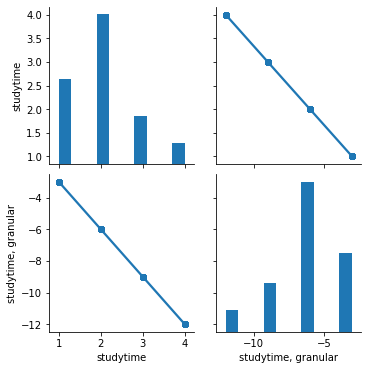

In [89]:
sns.pairplot(students_df.loc[:, ['studytime', 'studytime, granular']], kind = 'reg')

In [90]:
students_df.loc[:, ['studytime', 'studytime, granular']].corr()

,studytime,"studytime, granular"
studytime,1.0,-1.0
"studytime, granular",-1.0,1.0


### Имеем полную корреляцию, а точнее обратную линейную зависимость. Для модели оба параметра не сгодятся, т.к. модели "не любят" сильно скоррелированные параметры. Учитывая, что суть второго параметра до конца не ясна, его мы отбросим и не будем брать в рассмотрение.

# failures
### Номинативный параметр, по существу странный. Вряд ли ученик впадет в депрессию и завалит экзамен, даже если у него было аж 3 неудачи за стенами школы за всё время обучения. Проверяем

In [91]:
students_df['failures'].value_counts(dropna=False)

0.0    263
1.0     35
NaN     20
2.0     10
3.0     10
Name: failures, dtype: int64

### Имеем много пропусков. Сделаем замену пропусков на 0, предположив как и ранее, что пропуск - суть отсутствие, т.е. 0.

In [92]:
students_df['failures'].fillna(0, inplace=True)
students_df['failures'].value_counts(dropna=False)

0.0    283
1.0     35
2.0     10
3.0     10
Name: failures, dtype: int64

In [93]:
students_df.groupby(['failures'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
failures,,,,,,,,
0.0,283.0,59.770318,16.046262,25.0,50.00,60.0,70.0,100.0
1.0,35.0,49.857143,13.530234,25.0,40.00,50.0,60.0,90.0
2.0,10.0,41.000000,12.649111,20.0,36.25,42.5,45.0,65.0
3.0,10.0,41.500000,8.834906,25.0,35.00,42.5,50.0,50.0


In [94]:
stat_dif(students_df, 'failures', 'score', 2, 0.05)

Найдены статистически значимые различия для пары параметров:
(0.0, 1.0)
P_value гипотезы о равенстве средних составляет:
0.0005268189675226738


### Я ошибся, влияние есть и весьма приличное. Причем влияние на итоговый балл возникает даже при одном фак-апе. У тех, у кого более одного, балл сползает еще ниже, причем это происходит уверенно, т.к. стандарное отклонение сужается. 
### Было бы неплохо иметь большую выборку вообще, и по категории 2 и 3 в частности. Возможно мы бы смогли получить Т-тест на парах 1 и 2, и 1 и 3. Здесь можно схлопнуть 2 и 3 в одно выборку(два и более фак-апа и несмываемый позор), т.к. по этим двум значениям параметра меры центра практически равны. Но т.к. торопиться мы не будем, т.к. выборки маловаты.
### Параметр оставляем.

# schoolsup
### Параметр номинативный, бинарный. Может оказывать влияние. Проверяем.

In [95]:
students_df['schoolsup'].value_counts(dropna=False)

no     283
yes     46
NaN      9
Name: schoolsup, dtype: int64

In [96]:
students_df.groupby(['schoolsup'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
schoolsup,,,,,,,,
no,283.0,59.522968,16.216684,20.0,50.0,60.0,70.0,100.0
yes,46.0,47.826087,12.412009,25.0,40.0,50.0,55.0,85.0


In [97]:
stat_dif(students_df, 'schoolsup', 'score', 2, 0.05)

Найдены статистически значимые различия для пары параметров:
('no', 'yes')
P_value гипотезы о равенстве средних составляет:
4.359246351611891e-06


### Здесь видим сильное влияние значений параметра на итоговый балл. Причем те, кто получают поддержку по учебе, получают её, видимо, чтобы подтянуть свой уровень знаний, т.к. их оценки ощутимо ниже тех, кто дополнительно не занимается. 
### Печалит, что есть 9 записей с пропуском и сходу непонятно, как заполнять. Посмотрим на них отдельно. 

In [98]:
students_df[students_df['schoolsup'].isna() == True].loc[:,['schoolsup','score']]

,schoolsup,score
27,NaN,75.0
35,NaN,30.0
79,NaN,25.0
151,NaN,70.0
211,NaN,65.0
274,NaN,50.0
321,NaN,45.0
392,NaN,35.0
394,NaN,45.0


In [99]:
students_df[students_df['schoolsup'].isna() == True]['score'].describe()

count     9.000000
mean     48.888889
std      17.814632
min      25.000000
25%      35.000000
50%      45.000000
75%      65.000000
max      75.000000
Name: score, dtype: float64

### Статистически эти парни похоже на тех "троечников", смущает, что стандартное отклонение здесь выше, чем в группе тех, кто точно получает поддержку, а верхний квартиль смещен на 10 единиц вправо. 
### Сделаем отсечение на значение 65 и перепроверим.

In [100]:
students_df[(students_df['schoolsup'].isna() == True) & (students_df['score'] <=65 )]['score'].describe()

count     7.000000
mean     42.142857
std      13.496031
min      25.000000
25%      32.500000
50%      45.000000
75%      47.500000
max      65.000000
Name: score, dtype: float64

### Стандартное отклонение мы ужали, при этом верхний квартиль приближается к значение для известной выборки. Медиана остаётся ниже медианы для известной выборки. 
### Что ж, тут есть два варианта действий:
### - Можно обозначенную выше часть из 7 записей закинуть к двоечникам и заменить пропуски на yes, двух определить к тем, кто не получает. 
### - Можно исключить эти записи. Да, 9 штук, но это можно пережить. Как видно по значению p-value, влияние сильное. 
### Лично я выбираю вариант с удалением для чистоты эксперимента.

In [101]:
students_df = students_df[students_df['schoolsup'].isna() == False]

In [102]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329 entries, 0 to 393
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               329 non-null    object 
 1   sex                  329 non-null    object 
 2   age                  329 non-null    int64  
 3   address              329 non-null    object 
 4   famsize              307 non-null    object 
 5   Pstatus              289 non-null    object 
 6   Medu                 329 non-null    float64
 7   Fedu                 329 non-null    float64
 8   Mjob                 329 non-null    object 
 9   Fjob                 329 non-null    object 
 10  reason               315 non-null    object 
 11  guardian             329 non-null    object 
 12  traveltime           329 non-null    float64
 13  studytime            329 non-null    float64
 14  failures             329 non-null    float64
 15  schoolsup            329 non-null    obj

### Параметр для модели оставляем.  

# famsup
### Знать бы, что кроется за описанием данного параметра - помощь родителей ребенку, или помощь необразованным родителям. Смотрим.

In [103]:
students_df['famsup'].value_counts(dropna=False)

yes    183
no     112
NaN     34
Name: famsup, dtype: int64

In [104]:
students_df.groupby(['famsup'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
famsup,,,,,,,,
no,112.0,58.526786,16.380036,20.0,50.0,55.0,70.0,100.0
yes,183.0,57.240437,16.679167,25.0,45.0,55.0,70.0,95.0


In [105]:
stat_dif(students_df, 'famsup', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd581addd50>,
      dtype=object)

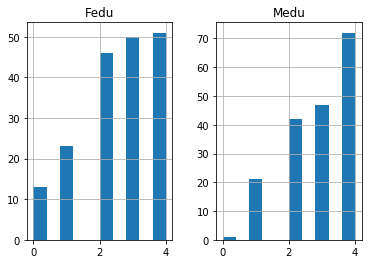

In [106]:
students_df[students_df['famsup'] == 'yes'].loc[:,['Medu', 'Fedu']].hist()

### Хорошие новости, что параметр не оказывает статистически значимого влияния и нет необходимости заниматься пропусками, которых здесь много. 
### Учитывая явную зависимость роста оказываемой помощи с ростом образованности родителей, можно сделать вывод, что в данном случае речь о помощи именно родителей своим чадам. 
### Параметр для учета модели не берем.

# paid
### Бинарный параметр, который по логике, должен влиять на итоговую оценку

In [107]:
students_df['paid'].value_counts(dropna=False)

no     157
yes    137
NaN     35
Name: paid, dtype: int64

In [108]:
stat_dif(students_df, 'paid', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


In [109]:
students_df.groupby(['paid'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
paid,,,,,,,,
no,157.0,59.076433,16.773583,25.0,50.0,60.0,70.0,100.0
yes,137.0,57.299270,15.671426,20.0,45.0,55.0,70.0,95.0


### Все указывает на то, что мы ошиблись и влияния нет. Для очистки совести предположим, что пропуски относятся к категории тех, кто не получает дополнительные платные занятия и перепроверим.

In [110]:
students_df['paid'].fillna('no', inplace=True)
students_df['paid'].value_counts(dropna=False)

no     192
yes    137
Name: paid, dtype: int64

In [111]:
stat_dif(students_df, 'paid', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Так и есть. Можно спать спокойно.
### Параметр исключаем.

# activities
### Еще один бинарник, при этом если дополнительные занятия по математике, то это должно влиять на оценку. Если по "музыке", то нет. Смотрим.

In [112]:
students_df['activities'].value_counts(dropna=False)

yes    165
no     152
NaN     12
Name: activities, dtype: int64

In [113]:
stat_dif(students_df, 'activities', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Видимо речь про занятие всем чем угодно, кроме математики. 
### Параметр исключаем, пропуски игнорируем.

# nursery
### Бинарный параметр. Слабо верится, что посещение детского сада может повлиять на бал по математике через 10-12 лет.

In [114]:
students_df['nursery'].value_counts(dropna=False)

yes    255
no      63
NaN     11
Name: nursery, dtype: int64

In [115]:
stat_dif(students_df, 'nursery', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Так и есть. Параметр исключаем из модели. 

# higher
### Еще один бинарник "ни о чем", т.к. уточнения о каком высшем образовании идет речь нет. 

In [116]:
students_df['higher'].value_counts(dropna=False)

yes    299
NaN     17
no      13
Name: higher, dtype: int64

### Пропусков много, а выборка тех, кто хочет быть свободным художником невелика. Заменяем пропуски на нет и делаем Т-тест.

In [117]:
students_df['higher'].fillna('no', inplace=True)
students_df['higher'].value_counts(dropna=False)

yes    299
no      30
Name: higher, dtype: int64

In [118]:
stat_dif(students_df, 'higher', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Се-ля-ви. В модель параметр не берем. 

# internet
### Еще один бинарник, претендущий стать мусорным

In [119]:
students_df['internet'].value_counts(dropna=False)

yes    258
no      43
NaN     28
Name: internet, dtype: int64

In [120]:
students_df['internet'].fillna('no', inplace=True)
students_df['internet'].value_counts(dropna=False)

yes    258
no      71
Name: internet, dtype: int64

In [121]:
stat_dif(students_df, 'internet', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Так и есть. В утиль.

# romantic
### Еще один бинарник, но интересный. Как известно, в этом возрасте чувства очень сильны, а разбитое сердце рушит мироздание. Возможно влияние, если конечно отношения протекают в период сдачи экзамена, а не до...

In [122]:
students_df['romantic'].value_counts(dropna=False)

no     208
yes     95
NaN     26
Name: romantic, dtype: int64

In [123]:
stat_dif(students_df, 'romantic', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


In [124]:
students_df['romantic'].fillna('no', inplace=True)
students_df['romantic'].value_counts(dropna=False)

no     234
yes     95
Name: romantic, dtype: int64

In [125]:
stat_dif(students_df, 'romantic', 'score', 2, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Нет, предположение о влиянии  не подтвердилось. И даже замена пропусков на нет не оказало какого-то значимого влияния. 

# famrel
### Номинативный, может влиять, т.к. плохие отношения деструктивно сказываются на образовательном процессе.

In [126]:
students_df['famrel'].value_counts(dropna=False)

 4.0    156
 5.0     82
 3.0     50
 NaN     22
 2.0     12
 1.0      6
-1.0      1
Name: famrel, dtype: int64

In [127]:
stat_dif(students_df, 'famrel', 'score', 3, 0.1)

Статистически значимых различий в исследуемой колонке не обнаружено


### Много артефактов, выборки по значениям 2 и 1 малы. Предположим, что пропуски - это совсем кошмар, -1 - это опечатка 1 и заменим все записи на значение 2, что будет означать ниже среднего. 

In [128]:
students_df['famrel'].fillna(2.0, inplace=True)
students_df['famrel'].replace([1.0, -1.0], 2.0, inplace=True)
students_df['famrel'].value_counts(dropna=False)

4.0    156
5.0     82
3.0     50
2.0     41
Name: famrel, dtype: int64

In [129]:
stat_dif(students_df, 'famrel', 'score', 4, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### После укрупнения выборки по значения параметра изменений с точки зрения влияния на итоговый балл не произошло.
### Параметр исключаем.

# freetime
### Еще один параметр, который для нашей модели вряд ли будет интересен.

In [130]:
students_df['freetime'].value_counts(dropna=False)

3.0    125
4.0     94
2.0     56
5.0     30
1.0     16
NaN      8
Name: freetime, dtype: int64

### Пропусков не так много, а если их заполнить значением 1, то это не приведет все равно данную выборку к достаточно крупной. Делаем Т-тест без замен.

In [131]:
stat_dif(students_df, 'freetime', 'score', 4, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Параметр нам не пригодится

# goout 
### Можно предположить, что здесь все будет так же как и пунктом выше. 

In [132]:
students_df['goout'].value_counts(dropna=False)

3.0    108
2.0     89
4.0     71
5.0     39
1.0     18
NaN      4
Name: goout, dtype: int64

In [133]:
stat_dif(students_df, 'goout', 'score', 4, 0.05)

Найдены статистически значимые различия для пары параметров:
(2.0, 4.0)
P_value гипотезы о равенстве средних составляет:
0.0019042640878777907
Найдены статистически значимые различия для пары параметров:
(2.0, 5.0)
P_value гипотезы о равенстве средних составляет:
0.004413164086549551


In [134]:
students_df.groupby(['goout'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
goout,,,,,,,,
1.0,18.0,61.388889,13.151331,45.0,50.0,55.0,72.5,85.0
2.0,89.0,61.460674,15.396322,30.0,50.0,60.0,75.0,100.0
3.0,108.0,59.259259,15.941113,25.0,50.0,57.5,70.0,95.0
4.0,71.0,53.661972,15.674314,25.0,40.0,50.0,65.0,95.0
5.0,39.0,52.307692,18.632391,20.0,40.0,50.0,62.5,90.0


### Хм, влияние есть, особенно между группами 2 и 4. Пропуски определим в категории 1, и посмотрим как изменится распределение категории 1, т.к. выборка по ней невелика. Категория 3 близка к значения общей выборке score.
### Видна зависимость общего снижения успеваемости от роста тусовок с друзьями, что имеет место быть в реальной жизни. 

In [135]:
students_df['goout'].fillna(1.0, inplace=True)
students_df.groupby(['goout'])['score'].describe()

,count,mean,std,min,25%,50%,75%,max
goout,,,,,,,,
1.0,22.0,60.227273,14.013367,35.0,50.0,55.0,72.5,85.0
2.0,89.0,61.460674,15.396322,30.0,50.0,60.0,75.0,100.0
3.0,108.0,59.259259,15.941113,25.0,50.0,57.5,70.0,95.0
4.0,71.0,53.661972,15.674314,25.0,40.0,50.0,65.0,95.0
5.0,39.0,52.307692,18.632391,20.0,40.0,50.0,62.5,90.0


In [136]:
stat_dif(students_df, 'goout', 'score', 5, 0.05)

Найдены статистически значимые различия для пары параметров:
(2.0, 4.0)
P_value гипотезы о равенстве средних составляет:
0.0019042640878777907
Найдены статистически значимые различия для пары параметров:
(2.0, 5.0)
P_value гипотезы о равенстве средних составляет:
0.004413164086549551


### Сильно это не повлияло, т.к. меры центра практически не изменились. результаты Т-теста тоже остались прежними.
### Параметр оставляем

# health
### Влияние маловероятно, т.к. здоровье в момент опроса - это не здоровье в момент сессии. Проверяем.

In [137]:
students_df['health'].value_counts(dropna=False)

5.0    116
3.0     74
4.0     49
1.0     43
2.0     34
NaN     13
Name: health, dtype: int64

In [138]:
stat_dif(students_df, 'health', 'score', 5, 0.05)

Статистически значимых различий в исследуемой колонке не обнаружено


### Так и есть.  Не берем в расчет параметр.

# absences
### Первый по-настоящему числовой параметр. По логике должен непосредственное влияние оказывать на итоговый балл. Смотрим.

In [139]:
students_df['absences'].describe()

count    320.000000
mean       8.306250
std       25.506038
min        0.000000
25%        2.000000
50%        4.000000
75%        9.000000
max      385.000000
Name: absences, dtype: float64

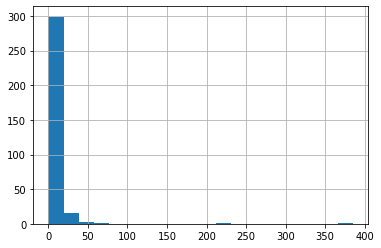

In [140]:
students_df['absences'].hist(bins=20)

### На лицо наличие "залетных", видимо лютых прогульщиков. Межквартильный размах равен 7, значит верхняя планка отсечения нашим фильтром пройдет на значении 9 + 1,5 х 7 = 19,5. Посмотрим как у них дела с успеваемостью, пока суровая статистика не отправила их в безизвестность.

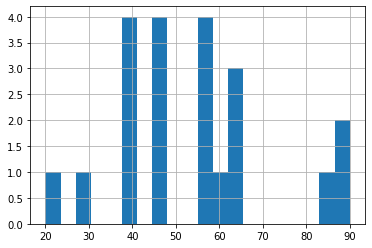

In [141]:
students_df[students_df['absences'] > 19.5]['score'].hist(bins=20)

In [142]:
students_df[students_df['absences'] > 19.5]['score'].describe()

count    21.000000
mean     53.809524
std      18.432632
min      20.000000
25%      40.000000
50%      55.000000
75%      65.000000
max      90.000000
Name: score, dtype: float64

In [143]:
stats.normaltest(students_df[students_df['absences'] > 19.5]['score'], nan_policy = 'omit')

NormaltestResult(statistic=1.5091609428223818, pvalue=0.47020783898817575)

### Интересно, успеваемость у залетных распределена вполне себе нормально. Можно сделать вывод, что здесь возможна какая-то ошибка при заполнении данного параметра. Отфильтруем данные от выбросов и посмотрим, как изменилось распределение и выборка.

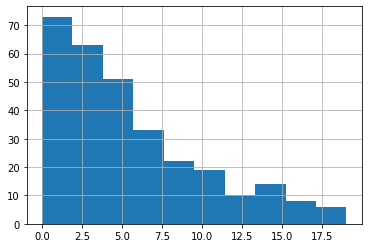

In [144]:
students_df = iqr_filter(students_df, 'absences')
students_df['absences'].hist(bins=10)

### Наблюдаем логичное распределение с линейным убыванием по мере роста кол-ва прогулов. Проверим то, что осталось на пропуски. 

In [145]:
students_df[students_df['absences'].isna() == True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               0 non-null      object 
 1   sex                  0 non-null      object 
 2   age                  0 non-null      int64  
 3   address              0 non-null      object 
 4   famsize              0 non-null      object 
 5   Pstatus              0 non-null      object 
 6   Medu                 0 non-null      float64
 7   Fedu                 0 non-null      float64
 8   Mjob                 0 non-null      object 
 9   Fjob                 0 non-null      object 
 10  reason               0 non-null      object 
 11  guardian             0 non-null      object 
 12  traveltime           0 non-null      float64
 13  studytime            0 non-null      float64
 14  failures             0 non-null      float64
 15  schoolsup            0 non-null      object 
 16  fa

### Пропусков нет. Можно посмотреть корреляцию очищенного параметра с целевым параметром score.

In [146]:
students_df.loc[:, ['absences', 'score']].corr()

,absences,score
absences,1.00000,-0.26147
score,-0.26147,1.00000


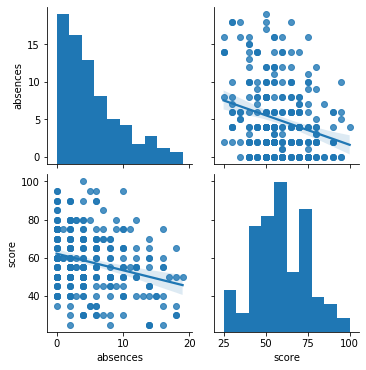

In [147]:
sns.pairplot(students_df.loc[:, ['absences', 'score']], kind = 'reg')

### Минус означает обратную зависимость, что логично. Значение по модулю говорит о слабой корреляции (больше 0,2 но меньше 0,5). Графики расположенные на главной диагонали повторяют картину, которую мы наблюдали ранее. 
### Параметр хороший, оставляем для модели.

# Итого
### Мы проанализировали все колонки и проанализировали пригодность каждого параметра для построения модели. Из всех параметров только два - absences и score являются истинно числовыми с условно непрерывным распределением. Остальные являются номинативными. При этом в датафрейме присутствовало два параметра статистически влияющих на итоговую оценку, а именно studytime и studytime, granular. Как было определено оба параметра полностью скоррелированы и один из них был исключен из дальнейшего рассмотрения. 
### Список параметров для целей построения модели выбран следющий: score, Medu, Fedu, stadytime, failures, schoolsup, goout, absences. 
### При этом мы исключили два параметра включение которых посчитали спорным, а именно Mjob, Fjob. Чтобы однозначно определиться с ними необходимо получить более широкую процентов на 30-40 выборку данных. А так же мы отфильтровали и вынесли в отдельный датафрейм все записи с нулевым значением итогового балла. Количество таких записей превышает 10% от изначального числа, что является значимым. При этом сам параметр является ключевым, и замена 0 на,например, медианное значение стоит может влиять на результат работы модели. Поэтому эту игру стоит проводить после построения модели, либо запросить у UNICEF, что они хотели этим сказать.
### Итоговый датафрейм выглядит следующим образом.

In [148]:
students_df = students_df.loc[:, ['Medu', 'Fedu', 'studytime', 'failures', 
                                  'schoolsup', 'goout', 'absences', 'score']]
students_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 393
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Medu       299 non-null    float64
 1   Fedu       299 non-null    float64
 2   studytime  299 non-null    float64
 3   failures   299 non-null    float64
 4   schoolsup  299 non-null    object 
 5   goout      299 non-null    float64
 6   absences   299 non-null    float64
 7   score      299 non-null    float64
dtypes: float64(7), object(1)
memory usage: 31.0+ KB


In [149]:
students_df.head()

,Medu,Fedu,studytime,failures,schoolsup,goout,absences,score
0,4.0,4.0,2.0,0.0,yes,4.0,6.0,30.0
1,1.0,1.0,2.0,0.0,no,3.0,4.0,30.0
2,1.0,1.0,2.0,3.0,yes,2.0,10.0,50.0
3,4.0,2.0,3.0,0.0,no,2.0,2.0,75.0
4,3.0,3.0,2.0,0.0,no,2.0,4.0,50.0


### По итогу по дороге потеряли четверть записей. Shit happens, запросим у UNICEF еще.
### Прйдемся еще по оставшимяс данным с точки зрения поиска взаимосвязей. 

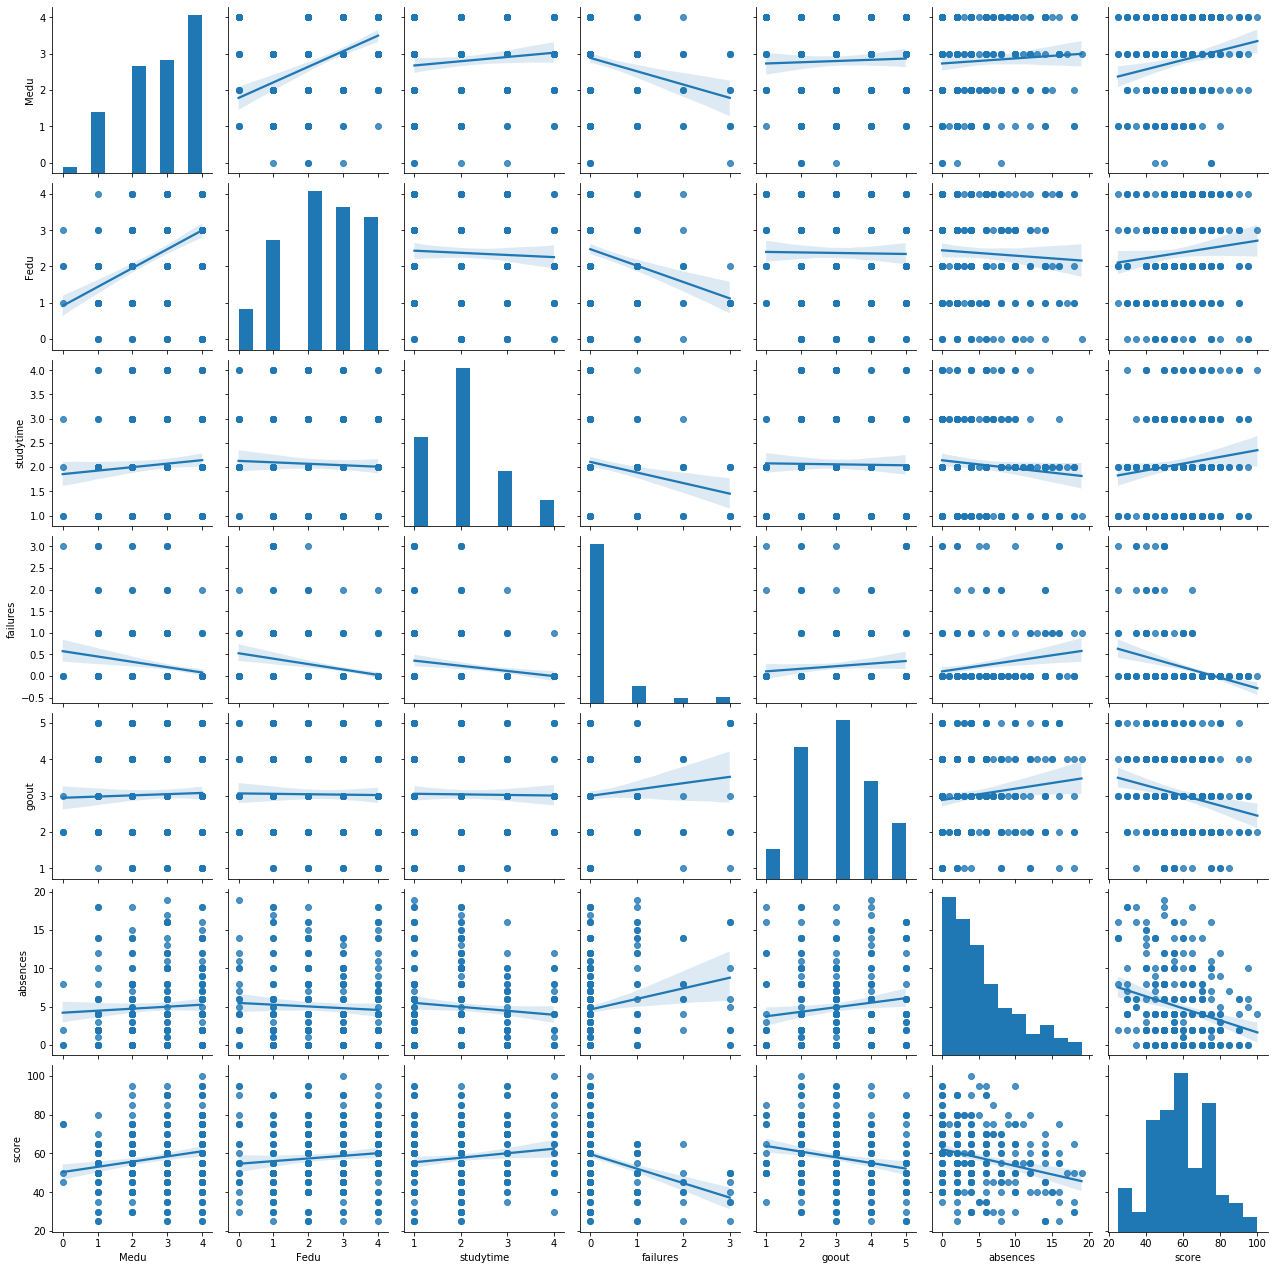

In [153]:
sns.pairplot(students_df, kind = 'reg')

In [154]:
students_df.corr()

,Medu,Fedu,studytime,failures,goout,absences,score
Medu,1.000000,0.472143,0.091831,-0.212760,0.033604,0.060595,0.187225
Fedu,0.472143,1.000000,-0.042028,-0.237967,-0.012708,-0.058229,0.104820
studytime,0.091831,-0.042028,1.000000,-0.161417,-0.012699,-0.093872,0.127158
failures,-0.212760,-0.237967,-0.161417,1.000000,0.101874,0.185726,-0.301920
goout,0.033604,-0.012708,-0.012699,0.101874,1.000000,0.135929,-0.201529
absences,0.060595,-0.058229,-0.093872,0.185726,0.135929,1.000000,-0.261470
score,0.187225,0.104820,0.127158,-0.301920,-0.201529,-0.261470,1.000000


### Тут интересует поиск корреляционных взаимосвязей параметров, которые мы отобрали как статистически значимые и влияющие на итоговый бал. Значения корреляции с параметром score в интервале. 
### Строго говоря, значения Medu, Fedu и studytime коррелируют очень слабо, что было видно по значениям P-value в Т-тесте.
### Failures, goout, absences - находятся в оптимальной зоне 0.2-0.5 слабой корреляции.
### При этом есть корреляция параметров Failures и Medu, Fedu на уровне более 0.2.
### Самое сильное значение корреляции для параметров Medu, Fedu на уровне близком к 0.5, что закономерно, т.к. характеризует выбор по формированию социальных пар по близости ментальности и уровню образованности. 

### Таким образом, можно провести оптимизацию, откинув параметры Medu, Fedu, как слабовлияющие на распределение оценок и в то же время сильно-коррелированные с параметром failure, который в свою очередь оказывает значительное воздействие на отслеживаемые параметр score. Модель в данном случае вытянет историюю через параметр failures.
### Параметр studytime можно также удалить, т.к. он больше скоррелирован с failures, нежели со score. Но мы пока его оставим до этапа построения модели и обкатки ее на большем объеме данных.
